# Training Mobile Ready Light Models

## Table of Contents

- [Introduction](#Introduction)
- [Prerequisites](#Prerequisites)
- [Supported Models](#Supported-Models)
- [Set Environment Variables](#Set-Environment-Variables)
- [Imports](#Imports)
- [Data preparation](#Data-preparation)
- [Visualize Training data](#Visualize-Training-data)
- [Train Model](#Train-Model)
    - [Model instantiation options](#Model-instantiation-options)
    - [Visualizing a few results](#Visualizing-a-few-results)
    - [Save Model to an intermediate format](#Save-Model-to-an-intermediate-format)
    - [Load a model and Train it further](#Load-a-model-and-Train-it-further)
- [Exporting model to mobile ready format](#Exporting-model-to-mobile-ready-format)
- [Deployment](#Deployment)

## Introduction

We can use `arcgis.learn` to train deep learning models that can be deployed on mobile devices using ArcGIS field apps. This enables AI on the edge and simplify jobs of field workers. This is done using TensorFlow which enables us to save trained models to '.tflite' format. A few applications of this workflow are 
- Assisted intelligent survey,
- Disconnected Decision support,
- Automatic feature extraction from street view,
- Automated Rapid data collection on the move,


 In this sample we are going to use street view images from ESRI campus, we have labeled a few fire water hydrants using [labelImg](#https://github.com/tzutalin/labelImg). 

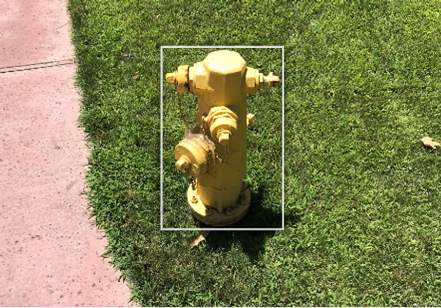

# Prerequisites

- This workflow is a buildup on top of the basic workflow followed to train deep learning models with `arcgis.learn` module. It is recommended to first have a reading of the basic workflow from [here](https://developers.arcgis.com/python/guide/geospatial-deep-learning/) if not done previously. 
- To train mobile ready light models **Tensorflow** library needs to be installed in addition to fastai and pytorch, please refer to the section "Install deep learning dependencies of arcgis.learn module" [on this page](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies-for-arcgis.learn-module) for detailed documentation on the installation of these dependencies.


## Supported Models

Currently, the following models can be used to deploy on mobile devices.  
- SingleShotDetector
- UnetClassifier
- FeatureClassifier

## Set Environment Variables

In [1]:
%env ARCGIS_ENABLE_TF_BACKEND=1

env: ARCGIS_ENABLE_TF_BACKEND=1


## Imports

In [2]:
from arcgis.learn import prepare_data, SingleShotDetector

## Data preparation

In [3]:
data = prepare_data(
    'Esri Campus Street view',
    dataset_type='PASCAL_VOC_rectangles',
    batch_size=16
)

## Visualize Training data

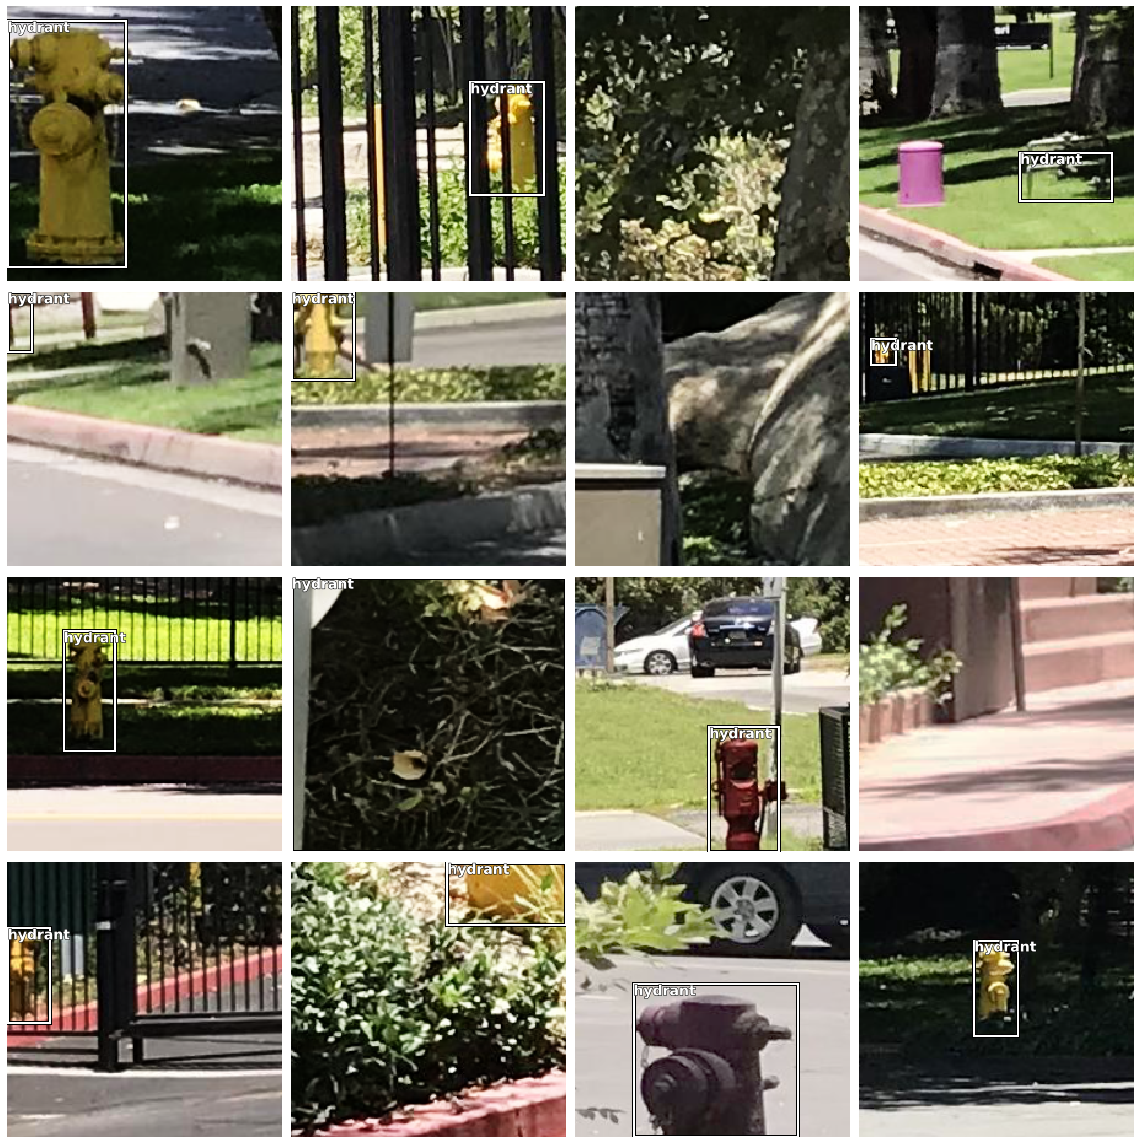

In [4]:
data.show_batch()

## Train Model

### Model instantiation options


 - `backbone`: Make sure you pick a mobile optimized backbone, currently we only support 'MobileNetV2' backbone.
 - `backend`: **Important !**, Make sure you select the backend as 'tensorflow' to enable saving the model to '.tflite' format.

In [4]:
model = SingleShotDetector(data, backbone='MobileNetV2', backend='tensorflow')

We would now find an appropriate learning rate using the `{model}.lr_find()` method.

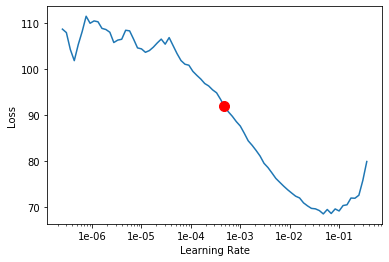

0.0004786301

In [9]:
model.lr_find()

We would now train the model by calling the `{model}.fit()` method.

In [10]:
model.fit(10, .001)

epoch,train_loss,valid_loss,time
0,83.268150,69.829430,02:07
1,64.897545,127.278946,02:12
2,53.009102,78.505455,02:14
3,47.769680,87.284019,02:12
4,42.050095,65.239113,02:10
5,38.110283,68.722237,02:11
6,34.360355,42.288395,02:09
7,32.069008,40.128288,02:10
8,29.411419,39.246643,02:11
9,28.012957,37.349281,02:20


Once our model has been fitted for the specified epochs, we can visualize a few sample predictions from the model using the `{model}.show_results()` method.

## Visualizing a few results 

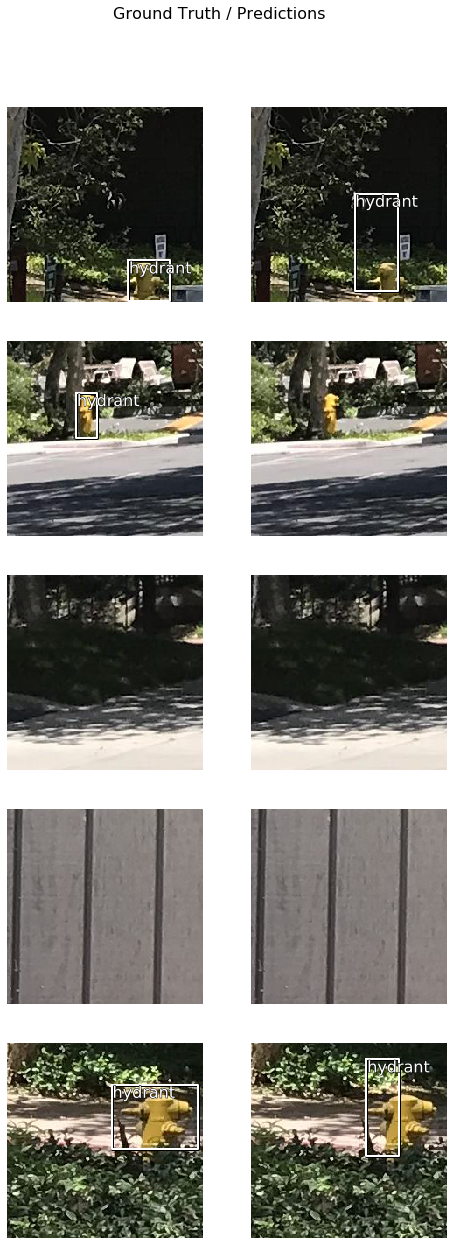

In [10]:
model.show_results(thresh=0.5)

## Save Model to an intermediate format 

We can use the `{model}.save()` method to save the model to 'keras_saved_model' format, this format can be used to save and load intermediate models in the training workflow. 

Note: **Important!** This format is not directly deployable on mobile devices and needs to exported to mobile ready format as explained in [this step](#Exporting-model-to-mobile-ready-format). 

In [12]:
model.save('10e')

WindowsPath('Esri Campus Street view/models/10e')

## Load a model and train it further

If you want to load a model save to an intermediate format explained [here](#Save-Model-to-an-intermediate-format) you can use the `{model}.load()` method.

Note: **Important !** Models saved in tflite format explained [here](#Exporting-model-to-mobile-ready-format) cannot be loaded back and trained further as it is an export only format

In [6]:
# model.load('10e')

## Exporting model to mobile ready format

We will now save the model we just trained to a format supported by ESRI Field Apps. Right now the only supported format is 'tflite', and it is required to set the parameter 'framework' to 'tflite' while calling the `{model}.save()` method.

Note: **Important!** This is an export only format, and once exported the output cannot be loaded back to the training workflow and fine-tuned again. To save checkpoints or reusable models that can be loaded back, you need to save the model to an intermediate format as explained [here](#Save-Model-to-an-intermediate-format)

In [11]:
model.save('10e_tflite', framework="tflite")

WindowsPath('Esri Campus Street view/models/10e_tflite')

## Deployment

The tf-lite model can now be deployed on mobile devices. Survey123 for ArcGIS has an upcoming feature that integrates such tf-lite models. To learn more on deploying this model in Survey123, join the [Early Adopter Community](https://www.esri.com/en-us/early-adopter) to access the Survey123 private beta.